# Section 1: Introduction:
In today's competitive business landscape, retaining customers is more crucial than ever. Companies often invest heavily in acquiring new customers, yet the cost of losing an existing customer can be even greater.

Understanding the factors that lead to customer churn—when a customer decides to stop using a service—is essential for creating effective retention strategies. Imagine having the power to predict which customers are at risk of leaving, enabling you to proactively address their needs and concerns before they decide to go.

<center><img src="https://www.cleartouch.in/wp-content/uploads/2022/11/Customer-Churn.png" width=500/></center>

By analyzing a comprehensive dataset that includes customer demographics, account details, and the services they've subscribed to, you can uncover the underlying reasons for churn. This knowledge allows businesses to tailor their retention programs, offering personalized solutions that enhance customer satisfaction and loyalty, ultimately driving long-term growth and profitability. Let's harness the power of data to not only understand why customers leave but to keep them engaged and committed to your brand.

# Section 2: Import the necessary Libraries

In [59]:
# SMOTE is compatible with scikit-learn version 1.2.2
# Run it one time in your notebook environment

"""
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn
"""

'\n!pip uninstall scikit-learn --yes\n!pip uninstall imblearn --yes\n!pip install scikit-learn==1.2.2\n!pip install imblearn\n'

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Section 3: Loading the Data

Download the data [here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

**Dataset Information:**

**Content:**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called `Churn`.
- ervices that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents.

In [61]:
# Loading the data
churn_data = pd.read_csv('resources/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Viewing the data
churn_data.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
# Get the information about the dataset
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [63]:
# Remove the column - 'customerID'
churn_data = churn_data.drop(columns=['customerID'], axis=1)

# Section 4: EDA
EDA is the process of analyzing and visualizing the dataset to uncover underlying patterns, trends, and relationships. It helps in understanding the data's structure and guiding the feature selection and modeling process.

## 4.1 Check the distribution of the target variable - `Churn`.


In [64]:
# Check the distribution of the target variable
churn_data['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

## 4.2 Do an analysis of the churn rate wrt all the categorical variables

*Hint: Use normalized values to plot to avoid the class imbalance problem.*

In [65]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [66]:
# Analyze churn rate by categorical features
# Listing all the categorical columns
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

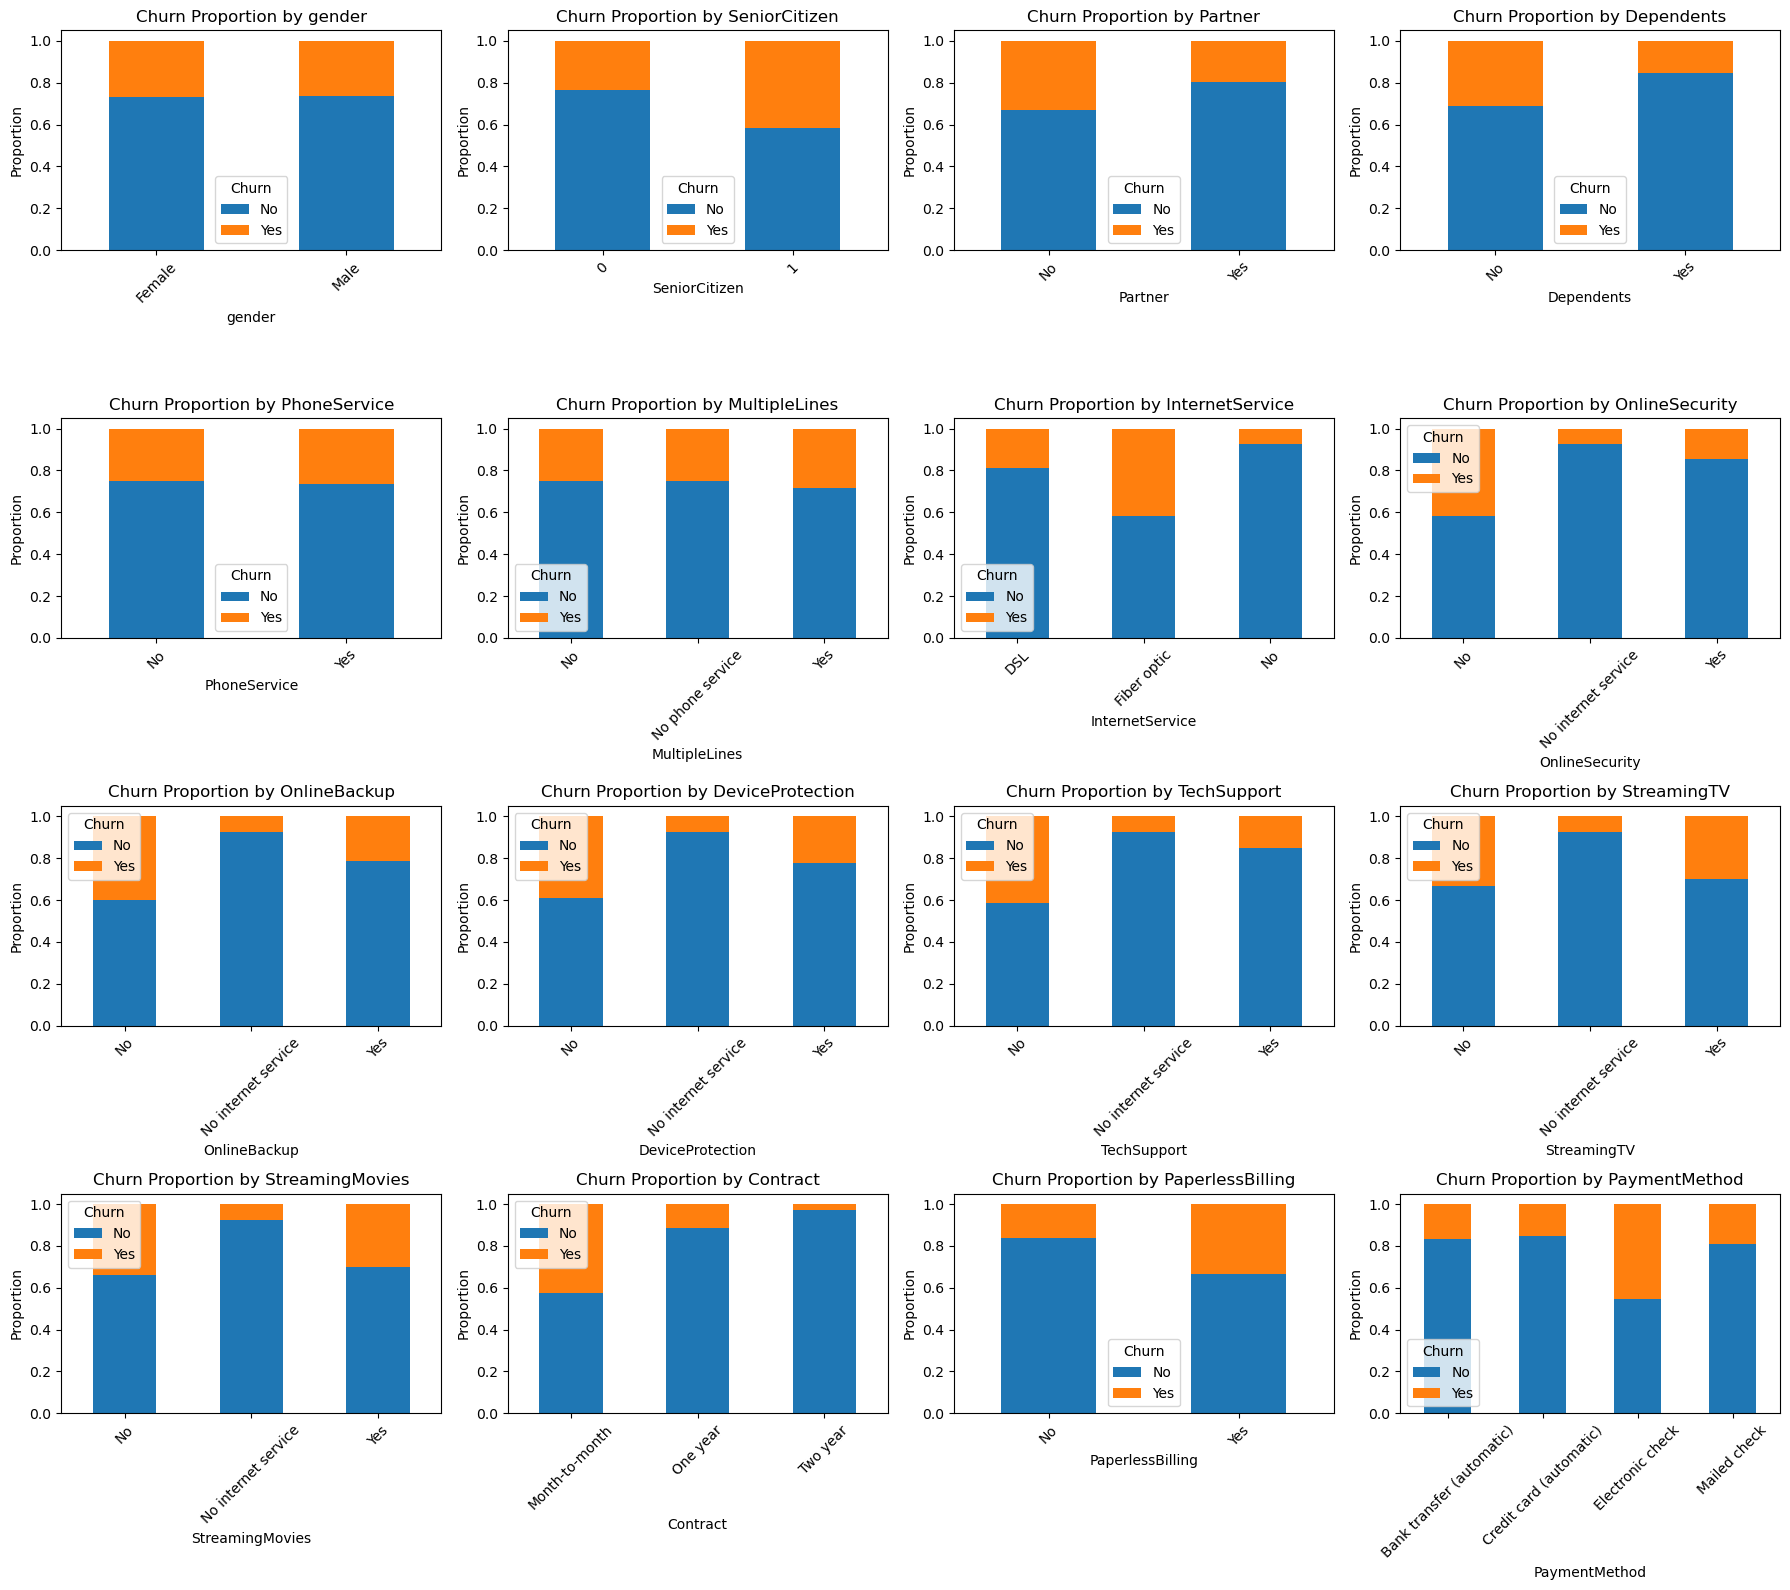

In [67]:
# Visualize the data
# Set up the subplot grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 16))
axes = axes.flatten()

# Plot each categorical feature in a subplot
for i, column in enumerate(categorical_columns):
    # Calculate normalized proportions because of class imbalance
    normalized_counts = (
        churn_data.groupby(column)['Churn']
        .value_counts(normalize=True)
        .unstack()
    )

    # Plotting the normalized counts as bar plots
    normalized_counts.plot(kind='bar', stacked=True, ax=axes[i])

    # Set title and labels
    axes[i].set_title(f"Churn Proportion by {column}")
    axes[i].set_ylabel('Proportion')
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()


# Section 5: Feature Engineering

## 5.1 Convert `TotalCharges` column to numeric

In [68]:
# Converting TotalCharges to numeric
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

## 5.2 Handle the categorical features by converting them to dummies

In [75]:
# One-hot encoding of the categorical features using pd.get_dummies()
churn_data = pd.get_dummies(churn_data, drop_first=True)
churn_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


## 5.3 Encode the `Churn` column
- `Yes` as 1
- `No` as 0

In [ ]:
# Encode the 'Churn' column
# We don't need to do this step as we have already encoded it using pd.get_dummies()
# Get the total sum for churn column
churn_data['Churn_Yes'].sum()


7043

## 5.4 Do a correlation analysis of the dataset

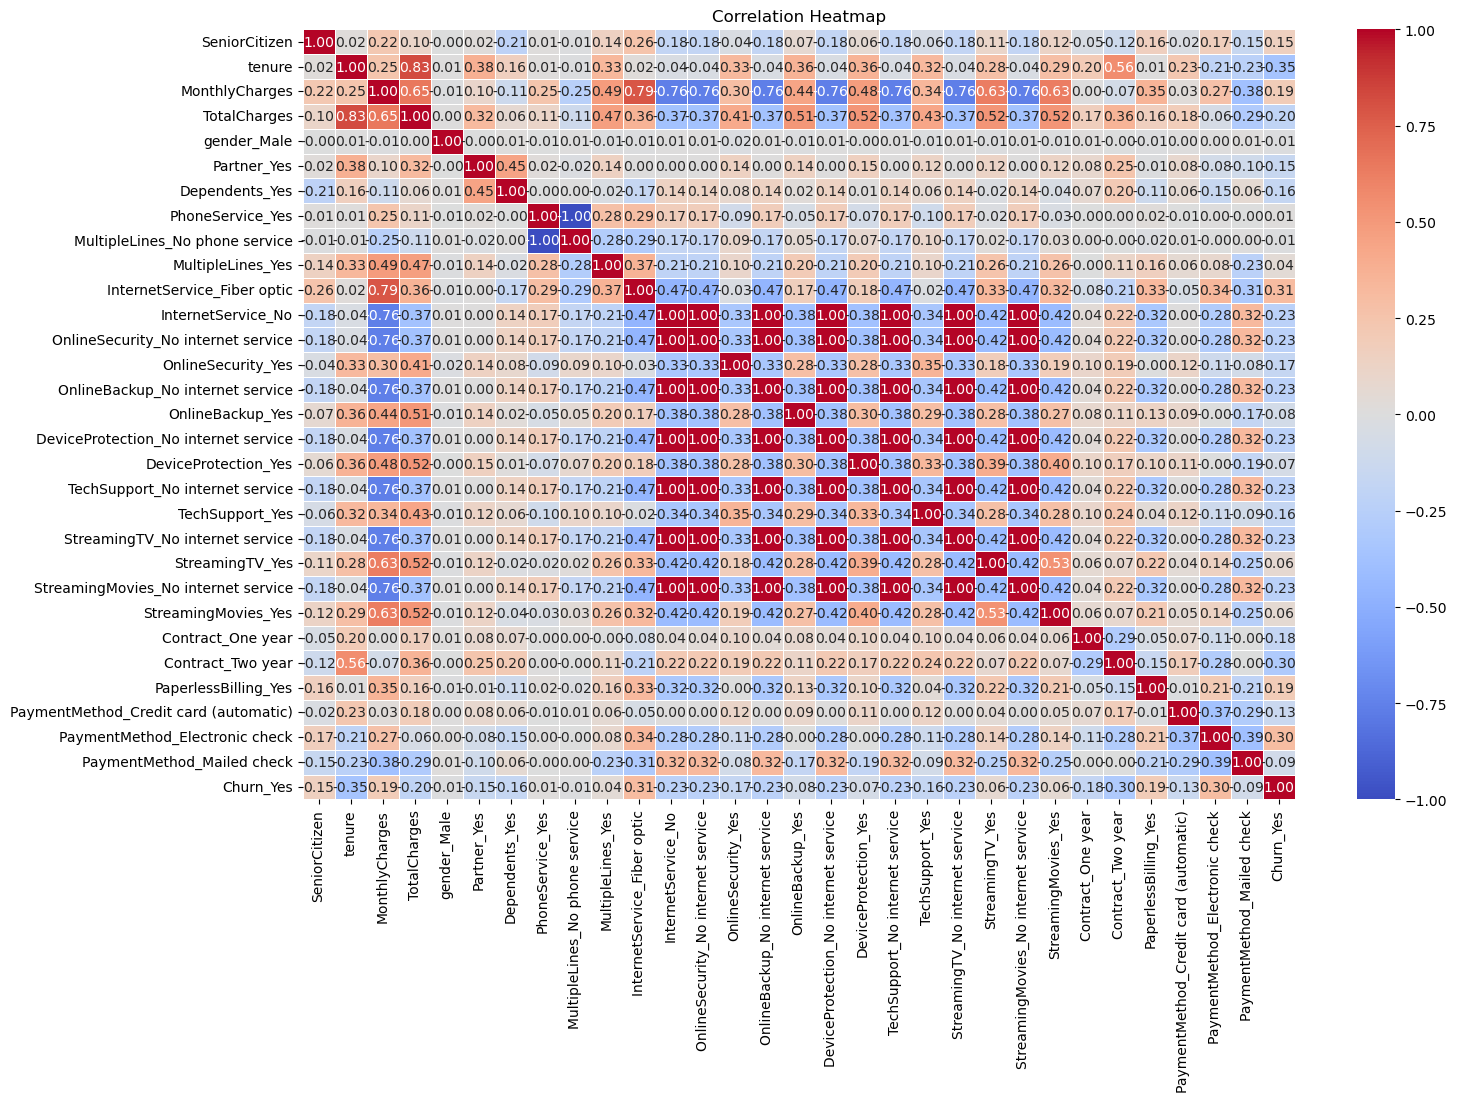

In [80]:
# Create a heatmap displying the correlation coefficients of the variables
plt.figure(figsize=(16, 10))
sns.heatmap(churn_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


## 5.5 Check for null values & handle them

In [ ]:
# Checking the na values
churn_data.isna().sum()

SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet serv

In [84]:
# Imputing with the mean for 'MonthlyCharges' column
# Calculating the mean of the data
mean_monthly_charges = churn_data['MonthlyCharges'].mean()

# Impute the mean
churn_data['MonthlyCharges'].fillna(mean_monthly_charges, inplace=True)

# Check the data
churn_data['MonthlyCharges'].isnull().sum()


0

# Section 6: Model Building

## 6.1 Split the data into train and test

In [86]:
# Define a function to split the data
def split_data(df: pd.DataFrame, target: str, test_size: float):
    # Create 'X'
    X = df.drop(columns=[target])
    # Create 'y'
    y = df[target]
    # Split into train & test
    return train_test_split(X, y, test_size=test_size, random_state=42)



In [87]:
# Call the function to split the data
X_train, X_test, y_train, y_test = split_data(churn_data, target='Churn_Yes', test_size=0.2)

In [88]:
# Check the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 30), (1409, 30), (5634,), (1409,))

In [96]:
# Check if X_train and X_test have any NaN values across columns
np.isnan(X_train).sum(), np.isnan(X_test).sum()

# Replace NaN values with column means
X_train = pd.DataFrame(X_train).fillna(pd.DataFrame(X_train).mean())
X_test = pd.DataFrame(X_test).fillna(pd.DataFrame(X_test).mean())

## 6.2 Scale the data

In [89]:
# Scaling the data
# StandardScaler can be used for scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 6.3 Build the Logistic Regression Model & check the metrics

In [97]:
# Building the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [98]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



## 6.4 Build a KNN model & Check the metrics

In [99]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluation of the model
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.83      0.86      0.85      1036
        True       0.57      0.52      0.55       373

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.76      0.77      0.77      1409



## 6.5 Handle the class imbalance  & check the metrics

In [100]:
# Importing the necessary libraries
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression()

# Fit the model on the smoted data
log_reg_model.fit(X_train_smote, y_train_smote)

# Predict on the testing set
y_pred = log_reg_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.73      0.81      1036
        True       0.52      0.83      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



In [101]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on smoted data
knn_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluation of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.69      0.77      1036
        True       0.46      0.72      0.56       373

    accuracy                           0.70      1409
   macro avg       0.67      0.71      0.67      1409
weighted avg       0.76      0.70      0.71      1409

